In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ALNOUR\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv(r"D:\ITI_DATA_Analysis\ITI Grad project\ITIProjects\Term Deposit\Data\Term Deposit.csv")

In [3]:
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
data["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

# Answering Questions

## 1.	How does the average yearly balance vary based on the client's job type?

In [6]:
data["job"]

0            admin.
1           unknown
2          services
3        management
4        technician
            ...    
31642    management
31643    management
31644    management
31645    technician
31646    management
Name: job, Length: 31647, dtype: object

In [7]:
job=pd.DataFrame(data.groupby("job").balance.mean())

In [8]:
job = job.reset_index()
job=job.sort_values("balance",ascending=False)

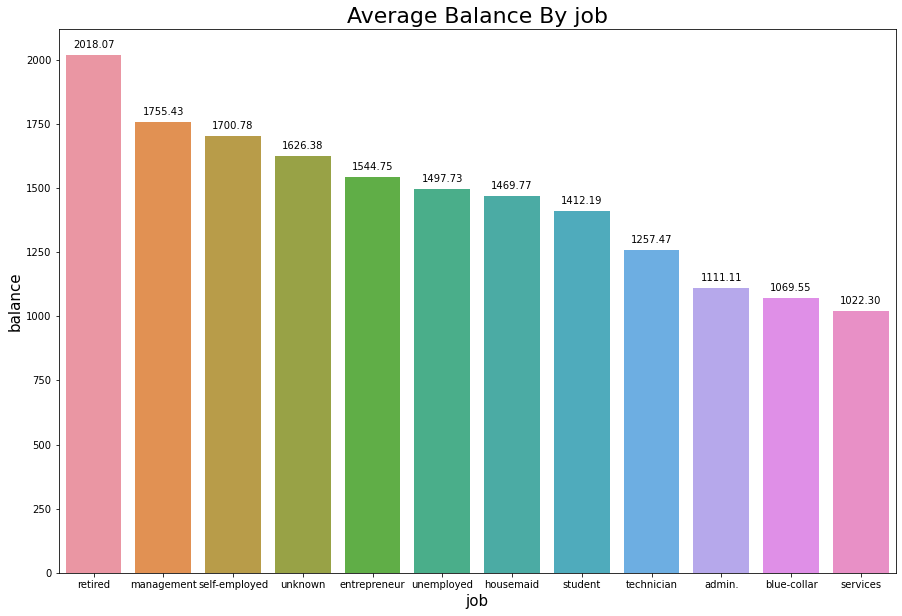

In [9]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x="job",y="balance",data=job)
# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title('Average Balance By job',fontsize = 22)
plt.xlabel('job', fontsize = 15);
plt.ylabel('balance', fontsize = 15);
# Show the chart
plt.show()

## -	Retired clients have the largest balance which makes perfect sense.
## -	Management-Layer clients are rich.
## -	Services and Blue-Collar have the lowest average yearly balance.


# 2- Is there a relationship between the client's education level and their decision to subscribe?

In [10]:
### let me convert  subscribed values from yes no into 1 ,0  
data.loc[data["subscribed"]=='yes',"subscribed"]=1
data.loc[data["subscribed"]=='no',"subscribed"]=0

In [11]:
## rate of subscribtion by education  get mean of subscribed group by  education
education=pd.DataFrame(data.groupby("education").subscribed.mean()*100).sort_values("subscribed",ascending=False)
education=education.reset_index()
education=education[education["education"]!="unknown"]
education

,education,subscribed
0,tertiary,15.213418
2,secondary,10.459813
3,primary,8.881032


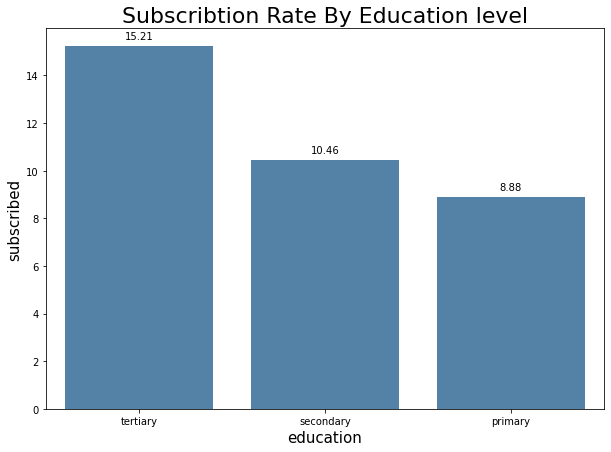

In [12]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x="education",y="subscribed",data=education,color='steelblue')
# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title('Subscribtion Rate By Education level',fontsize = 22)
plt.xlabel('education', fontsize = 15);
plt.ylabel('subscribed', fontsize = 15);
# Show the chart
plt.show()

## Clearly higher-educated clients are more likely to subscribe

# 3- Do clients with a personal loan tend to subscribe more or less frequently compared to those without a loan?


In [13]:
loan=pd.DataFrame(data.groupby("loan").subscribed.mean()*100).sort_values("subscribed",ascending=False)
loan=loan.reset_index()
loan

,loan,subscribed
0,no,12.762106
1,yes,6.450984


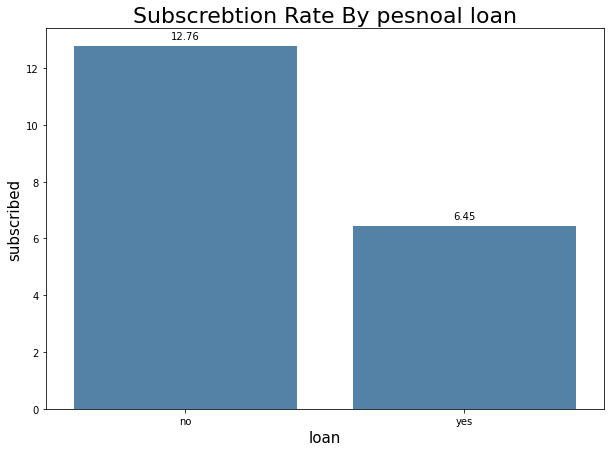

In [14]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x="loan",y="subscribed",data=loan,color='steelblue')
# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title('Subscrebtion Rate By pesnoal loan',fontsize = 22)
plt.xlabel('loan', fontsize = 15);
plt.ylabel('subscribed', fontsize = 15);
# Show the chart
plt.show()

## Clearly clients without a personal loan are more likely to subscribe

# 4- Are there any notable differences in the contact duration for subscribed and non-subscribed clients?

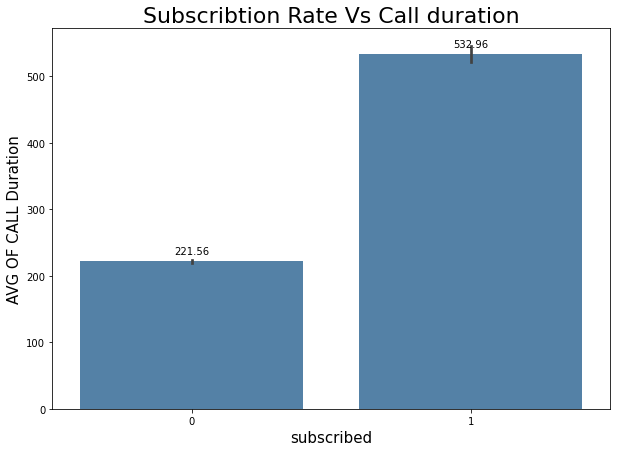

In [15]:
plt.figure(figsize=(10,7))
ax=sns.barplot(y="duration",x="subscribed",data=data,color='steelblue')
# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title('Subscribtion Rate Vs Call duration',fontsize = 22)
plt.xlabel('subscribed', fontsize = 15);
plt.ylabel('AVG OF CALL Duration', fontsize = 15);
plt.show()

##  The longer the call duration, the higher the number of subscriptions